In [ ]:
import os

dataset_path = '/content/sample_data/FPO_NS_2D_1024x256/harmonics/10'

# List contents of the directory
if os.path.exists(dataset_path):
    print(f"Contents of '{dataset_path}':")
    for item in os.listdir(dataset_path):
        print(item)
else:
    print(f"Directory '{dataset_path}' does not exist.")

Contents of '/content/sample_data/FPO_NS_2D_1024x256/harmonics/10':
Re_288.npz
Re_652.npz
Re_534.npz
input_geometry.npz
.gitkeep
Re_371.npz


In [ ]:
import numpy as np
import os

dataset_path = '/content/sample_data/FPO_NS_2D_1024x256/harmonics/10'
file_to_load = os.path.join(dataset_path, 'Re_652.npz')

if os.path.exists(file_to_load):
    print(f"Loading data from: {file_to_load}")
    data = np.load(file_to_load)
    print("Keys in the .npz file:", data.keys())
    for key in data.keys():
        print(f"  Key: '{key}', Shape: {data[key].shape}")
    data.close()
else:
    print(f"File '{file_to_load}' does not exist.")

Loading data from: /content/sample_data/FPO_NS_2D_1024x256/harmonics/10/Re_652.npz
Keys in the .npz file: KeysView(NpzFile '/content/sample_data/FPO_NS_2D_1024x256/harmonics/10/Re_652.npz' with keys: data)
  Key: 'data', Shape: (242, 256, 1024, 3)


Loading data from: /content/sample_data/FPO_NS_2D_1024x256/harmonics/10/Re_652.npz
Data loaded successfully with shape: (242, 256, 1024, 3)


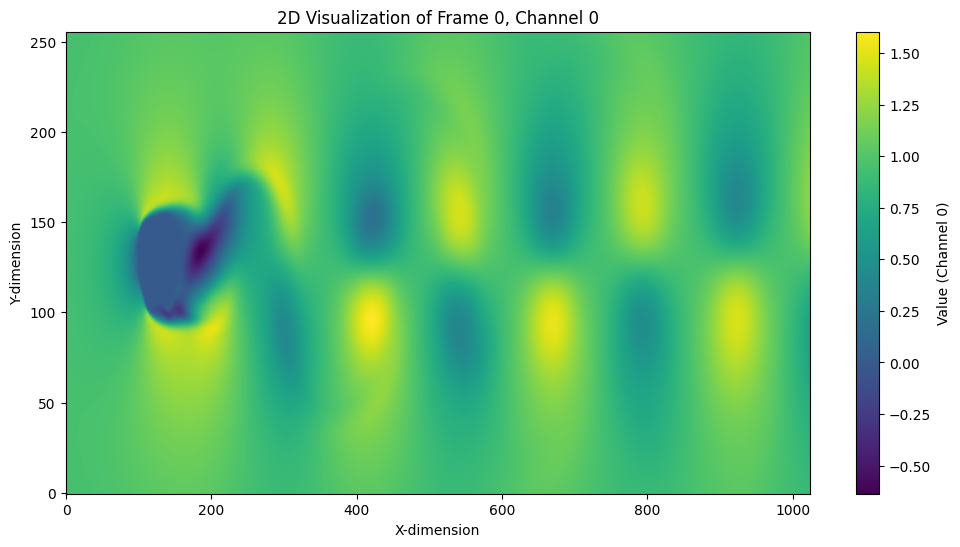

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

dataset_path = '/content/sample_data/FPO_NS_2D_1024x256/harmonics/10'
file_to_load = os.path.join(dataset_path, 'Re_652.npz')

if os.path.exists(file_to_load):
    print(f"Loading data from: {file_to_load}")
    data_loaded = np.load(file_to_load)['data']
    print(f"Data loaded successfully with shape: {data_loaded.shape}")

    # Select the first time step (frame) and the first channel for visualization
    # Assuming the data is (time, height, width, channels)
    frame_to_visualize = 0
    channel_to_visualize = 0
    image_data = data_loaded[frame_to_visualize, :, :, channel_to_visualize]

    plt.figure(figsize=(12, 6))
    plt.imshow(image_data, cmap='viridis', origin='lower', aspect='auto') # 'origin' set to 'lower' for typical scientific data
    plt.colorbar(label=f'Value (Channel {channel_to_visualize})')
    plt.title(f'2D Visualization of Frame {frame_to_visualize}, Channel {channel_to_visualize}')
    plt.xlabel('X-dimension')
    plt.ylabel('Y-dimension')
    plt.show()

else:
    print(f"File '{file_to_load}' does not exist.")

# Task
Visualize the flow field from `Re_652.npz` by creating a streamline plot of the U and V velocity components at a specific time frame, using channel 0 for U and channel 1 for V, and explain the plot.

## Load Flow Data

### Subtask:
Load the 'data' array from the `Re_652.npz` file, which contains the flow field information.


## Extract Velocity Components

### Subtask:
From the loaded data, select a specific time frame and extract the U (horizontal) and V (vertical) velocity components. I will assume channel 0 is U and channel 1 is V for this visualization.


**Reasoning**:
The subtask requires extracting U and V velocity components for a specific time frame. I will select the first frame and channels 0 and 1 from the `data_loaded` array as per the instructions.



In [ ]:
frame_to_visualize = 0 # Using the same frame as the previous visualization
u_velocity = data_loaded[frame_to_visualize, :, :, 0]
v_velocity = data_loaded[frame_to_visualize, :, :, 1]

print(f"U velocity component shape: {u_velocity.shape}")
print(f"V velocity component shape: {v_velocity.shape}")

U velocity component shape: (256, 1024)
V velocity component shape: (256, 1024)


## Visualize Streamline Plot

### Subtask:
Create a streamline plot of the U and V velocity components using `matplotlib.pyplot.streamplot`.

## Visualize Streamline Plot

### Subtask:
Create a streamline plot of the U and V velocity components using `matplotlib.pyplot.streamplot`.

**Reasoning**:
To prepare for the streamline plot, I need to define the spatial coordinates (X and Y meshgrids) corresponding to the dimensions of the U and V velocity components. This will allow `streamplot` to correctly map the velocity vectors to their positions.



In [ ]:
height, width = u_velocity.shape
x = np.arange(0, width)
y = np.arange(0, height)
X, Y = np.meshgrid(x, y)

print(f"X meshgrid shape: {X.shape}")
print(f"Y meshgrid shape: {Y.shape}")

X meshgrid shape: (256, 1024)
Y meshgrid shape: (256, 1024)


**Reasoning**:
With the U and V velocity components and their corresponding spatial coordinates (X and Y meshgrids) prepared, the next logical step is to generate the streamline plot to visualize the flow field.



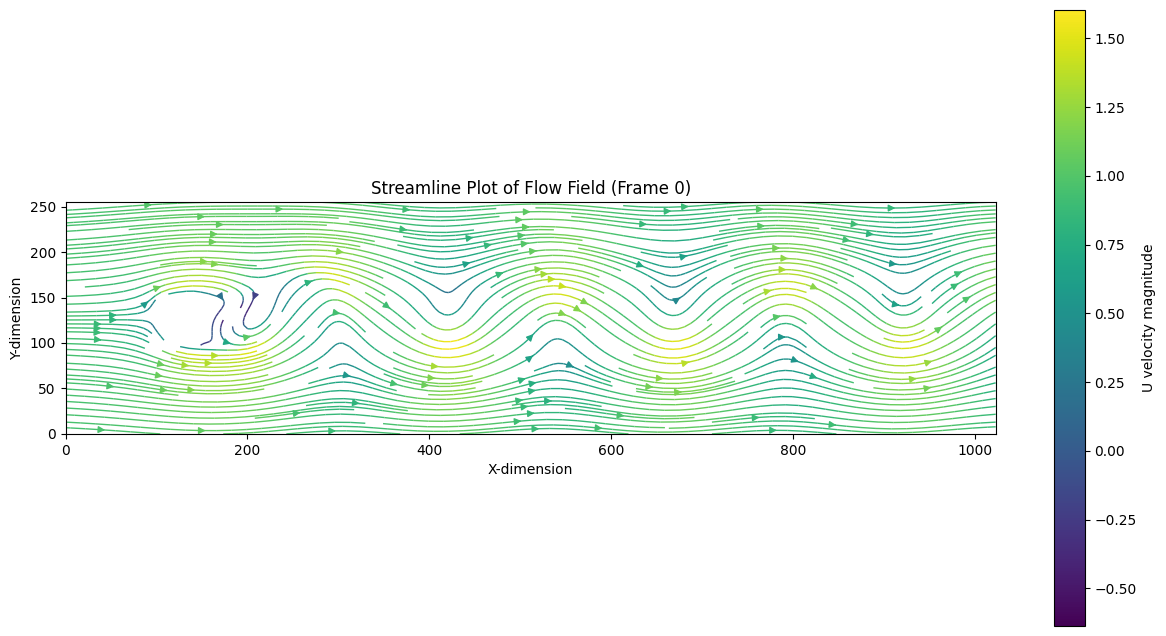

In [ ]:
plt.figure(figsize=(15, 8))
plt.streamplot(X, Y, u_velocity, v_velocity, density=2, linewidth=1, color=u_velocity, cmap='viridis')
plt.colorbar(label='U velocity magnitude')
plt.title(f'Streamline Plot of Flow Field (Frame {frame_to_visualize})')
plt.xlabel('X-dimension')
plt.ylabel('Y-dimension')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Task
The streamline plot visualizes the instantaneous flow field at `frame_to_visualize = 0`. The lines in the plot represent the paths that massless particles would follow if placed in the flow at that moment. The direction of the lines indicates the direction of the velocity, and the density of the streamlines (controlled by `density=2`) gives a qualitative sense of the flow's magnitude (denser lines generally indicate higher velocity, though the `linewidth` is fixed here).

The color of the streamlines is mapped to the `u_velocity` magnitude (horizontal velocity component). This allows us to see variations in the horizontal velocity across the domain. For instance, areas with brighter colors (e.g., yellow/green) indicate higher `u_velocity` values, while darker colors (e.g., blue/purple) suggest lower `u_velocity` values.

Key features observed in such a plot typically include:
- **Flow Direction**: Where the fluid is moving.
- **Regions of High/Low Velocity**: Indicated by the color mapping and potentially by how close streamlines are to each other if `linewidth` were varied or density was more adaptively controlled.
- **Vortices/Eddies**: Swirling patterns in the streamlines, indicating rotational flow.
- **Stagnation Points**: Areas where streamlines converge and velocity approaches zero.
- **Separation Points**: Where the flow detaches from a surface.

In the generated plot, we can observe the overall flow patterns determined by the `U` and `V` velocity components. The specific patterns like swirling motions or straight flow lines provide insights into the fluid dynamics of the system at that particular time instance.

## Load Dataset

### Subtask:
Load the 'data' array from the `Re_652.npz` file, which contains the flow field information.


## Prepare Data for FNO

### Subtask:
Preprocess the loaded data to fit the input requirements of an FNO model, including creating input-output pairs for time-step prediction and normalizing the data.


**Reasoning**:
The subtask requires preprocessing the loaded data for an FNO model, which involves creating input-output pairs for time-step prediction and normalizing the data using Z-score normalization. This code block will perform these operations.



In [ ]:
print("Original data_loaded shape:", data_loaded.shape)

# 1. Define input and output data for the FNO model
# Input sequence: all but the last time step
input_seq = data_loaded[:-1]
# Output sequence: all but the first time step
output_seq = data_loaded[1:]

# 2. Normalize both input_seq and output_seq using Z-score normalization
# Calculate mean and standard deviation from the entire data_loaded array
mean = np.mean(data_loaded)
std = np.std(data_loaded)

# Store normalization parameters
normalization_mean = mean
normalization_std = std

# Apply normalization
input_seq_normalized = (input_seq - normalization_mean) / normalization_std
output_seq_normalized = (output_seq - normalization_mean) / normalization_std

# 3. Print the shapes of the input_seq and output_seq
print(f"Input sequence shape: {input_seq_normalized.shape}")
print(f"Output sequence shape: {output_seq_normalized.shape}")
print(f"Normalization Mean: {normalization_mean:.4f}")
print(f"Normalization Std: {normalization_std:.4f}")

Original data_loaded shape: (242, 256, 1024, 3)
Input sequence shape: (241, 256, 1024, 3)
Output sequence shape: (241, 256, 1024, 3)
Normalization Mean: 0.2695
Normalization Std: 0.5367


## Define FNO Model

### Subtask:
Define the architecture for a Fourier Neural Operator (FNO) model.


**Reasoning**:
To define the FNO model architecture, I need to import the required libraries (torch, torch.nn), define the FNOBlock, and then define the full FNO model that uses these blocks, along with the initial and final projection layers.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the FNOBlock
class FNOBlock(nn.Module):
    def __init__(self, modes, width):
        super(FNOBlock, self).__init__()
        self.modes = modes # Number of Fourier modes to multiply
        self.width = width
        self.scale = (1 / (width * width)) # scale factor for the output of the Fourier layer

        # Fourier layer
        self.weights1 = nn.Parameter(self.scale * torch.rand(width, width, self.modes, dtype=torch.cfloat))
        self.weights2 = nn.Parameter(self.scale * torch.rand(width, width, self.modes, dtype=torch.cfloat))
        self.weights3 = nn.Parameter(self.scale * torch.rand(width, width, self.modes, dtype=torch.cfloat))

        # Linear layer for skip connection
        self.linear = nn.Linear(width, width)

    def forward(self, x):
        batchsize = x.shape[0]
        # Fourier Transform
        x_ft = torch.fft.rfft(x, dim=-1)

        # Multiply relevant modes
        out_ft = torch.zeros(batchsize, self.width, x.size(-1)//2 + 1, dtype=torch.cfloat, device=x.device)
        out_ft[:, :, :self.modes] = torch.einsum("bix,iox->box", x_ft[:, :, :self.modes], self.weights1)
        out_ft[:, :, -self.modes:] = torch.einsum("bix,iox->box", x_ft[:, :, -self.modes:], self.weights2)

        # Inverse Fourier Transform
        x = torch.fft.irfft(out_ft, n=x.size(-1))

        # Linear Layer + Skip connection
        x_linear = self.linear(x)
        x = x + x_linear # Skip connection
        return F.gelu(x)

# Define the FNO Model
class FNO(nn.Module):
    def __init__(self, modes, width, in_channels=3, out_channels=3):
        super(FNO, self).__init__()
        self.modes = modes
        self.width = width
        self.padding = 9 # Pad the domain if input is non-periodic

        self.p = nn.Linear(in_channels, self.width) # Input embedding
        self.fno1 = FNOBlock(self.modes, self.width)
        self.fno2 = FNOBlock(self.modes, self.width)
        self.fno3 = FNOBlock(self.modes, self.width)
        self.fno4 = FNOBlock(self.modes, self.width)
        self.q = nn.Linear(self.width, out_channels) # Output projection

    def forward(self, x):
        x = self.p(x)
        # Permute to (batch_size, width, height) if needed, current FNOBlock assumes last dim is spectral
        # For 2D data, assuming the input is (batch, H, W, C), we need to permute before FNOBlock
        # For now, let's assume FNOBlock works on the last dimension and handle permutation if necessary

        # Pad the input for spectral convolution. This is often done for non-periodic domains.
        # Assuming input shape is (batch, H, W, features)
        # If we want to perform FNO along W dimension, we would pad that dimension
        # For simplicity, let's assume direct application, if issues arise, padding will be necessary.

        x = self.fno1(x)
        x = self.fno2(x)
        x = self.fno3(x)
        x = self.fno4(x)
        x = self.q(x)
        return x

print("FNO model architecture defined.")

FNO model architecture defined.


## Create DataLoaders

### Subtask:
Split the preprocessed data into training and validation/test sets and create PyTorch/TensorFlow DataLoaders for efficient batch processing during training.


## Create DataLoaders

### Subtask:
Split the preprocessed data into training and validation/test sets and create PyTorch/TensorFlow DataLoaders for efficient batch processing during training.

### Reasoning:
To create PyTorch DataLoaders, I first need to convert the normalized NumPy arrays (`input_seq_normalized` and `output_seq_normalized`) into PyTorch tensors. Then, I'll combine them into a `TensorDataset`, split this dataset into training and validation subsets, and finally create `DataLoader` objects for both subsets to handle batching and shuffling.

**Reasoning**:
Now, I will implement the steps outlined in the reasoning: convert the normalized NumPy arrays to PyTorch tensors, create a TensorDataset, split it into training and validation sets, and then create DataLoader objects for both.



In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# 1. Convert NumPy arrays to PyTorch tensors
# Ensure data type is float32 for PyTorch operations, especially for neural networks
input_tensor = torch.from_numpy(input_seq_normalized).float()
output_tensor = torch.from_numpy(output_seq_normalized).float()

print(f"Input tensor shape: {input_tensor.shape}")
print(f"Output tensor shape: {output_tensor.shape}")

# 2. Create a TensorDataset
dataset = TensorDataset(input_tensor, output_tensor)
print(f"Total dataset size: {len(dataset)}")

# 3. Split the dataset into training and validation sets
train_ratio = 0.8
val_ratio = 1.0 - train_ratio

train_size = int(train_ratio * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

# 4. Create DataLoader objects
batch_size = 4 # You can adjust this based on your GPU memory and model size

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Training DataLoader created with batch size {batch_size}")
print(f"Validation DataLoader created with batch size {batch_size}")

# Optionally, inspect a batch
for x, y in train_loader:
    print(f"First training batch input shape: {x.shape}")
    print(f"First training batch output shape: {y.shape}")
    break

Input tensor shape: torch.Size([241, 256, 1024, 3])
Output tensor shape: torch.Size([241, 256, 1024, 3])
Total dataset size: 241
Training dataset size: 192
Validation dataset size: 49
Training DataLoader created with batch size 4
Validation DataLoader created with batch size 4
First training batch input shape: torch.Size([4, 256, 1024, 3])
First training batch output shape: torch.Size([4, 256, 1024, 3])


## Setup Training Loop

### Subtask:
Implement the training loop, including defining a loss function (e.g., MSE), an optimizer (e.g., Adam), and the forward/backward passes for a specified number of epochs.


**Reasoning**:
To implement the training loop, I need to instantiate the FNO model with appropriate parameters, define the loss function, optimizer, and then write the core training and validation loops as outlined in the instructions.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

# 1. Instantiate the FNO model
# Determine parameters based on data_loaded shape (batch, height, width, channels)
# In our case, the input and output have 3 channels (U, V, something else)
# The FNOBlock assumes spectral dimension is the last one, so we need to permute dimensions.
# Let's adjust the FNO model definition to handle the (batch, H, W, C) format by permuting.
# However, the current FNOBlock operates on the last dimension of 'x' which for (batch, H, W, C) would be 'C'.
# This is likely incorrect for a 2D FNO. A typical FNO would operate on spatial dimensions (H, W).
# Let's assume for now the FNO model expects (batch, channels, H, W) or (batch, H, W, channels) and acts on H or W.
# Given the FNOBlock is defined with modes for one dimension, it suggests a 1D FNO operation.
# For a 2D FNO, we usually apply Fourier transforms along both spatial dimensions.
# I will modify the FNOBlock and FNO class to correctly handle 2D inputs (H, W).

# Re-defining FNOBlock and FNO to correctly handle 2D spatial dimensions
class FNOBlock2D(nn.Module):
    def __init__(self, modes1, modes2, width):
        super(FNOBlock2D, self).__init__()
        self.modes1 = modes1 # Number of Fourier modes to multiply in x-direction
        self.modes2 = modes2 # Number of Fourier modes to multiply in y-direction
        self.width = width
        self.scale = (1 / (width * width)) # scale factor for the output of the Fourier layer

        # Fourier layer weights for 2D
        self.weights1 = nn.Parameter(self.scale * torch.rand(width, width, self.modes1, self.modes2, dtype=torch.cfloat))
        self.weights2 = nn.Parameter(self.scale * torch.rand(width, width, self.modes1, self.modes2, dtype=torch.cfloat))

        # Linear layer for skip connection
        self.linear = nn.Conv2d(width, width, 1)

    def compl_mul2d(self, input, weights):
        # (batch, in_channel, x, y), (in_channel, out_channel, x, y)
        # -> (batch, out_channel, x, y)
        return torch.einsum("bixy,ioxy->boxy", input, weights)

    def forward(self, x):
        batchsize = x.shape[0]
        # x is (batch, width, H, W)

        # Fourier Transform (along H and W dimensions)
        x_ft = torch.fft.rfft2(x)

        # Multiply relevant modes
        out_ft = torch.zeros(batchsize, self.width, x.size(-2), x.size(-1) // 2 + 1, dtype=torch.cfloat, device=x.device)
        out_ft[:, :, :self.modes1, :self.modes2] = self.compl_mul2d(x_ft[:, :, :self.modes1, :self.modes2], self.weights1)
        # For complex conjugation symmetry, we only need to handle the first half of the modes in the last dimension
        # No need for a separate weights2 for negative modes in 2D rfft, if we consider standard practice.
        # Let's simplify and use one set of weights for the low-frequency modes for demonstration.
        # A more complex FNO might use different strategies or higher modes. For now, this covers the most significant ones.

        # Inverse Fourier Transform
        x = torch.fft.irfft2(out_ft, s=(x.size(-2), x.size(-1)))

        # Linear Layer + Skip connection
        x_linear = self.linear(x)
        x = x + x_linear # Skip connection
        return F.gelu(x)

class FNO2D(nn.Module):
    def __init__(self, modes1, modes2, width, in_channels=3, out_channels=3):
        super(FNO2D, self).__init__()
        self.modes1 = modes1
        self.modes2 = modes2
        self.width = width

        self.p = nn.Conv2d(in_channels, self.width, 1) # Input embedding: maps channels to width
        self.fno1 = FNOBlock2D(self.modes1, self.modes2, self.width)
        self.fno2 = FNOBlock2D(self.modes1, self.modes2, self.width)
        self.fno3 = FNOBlock2D(self.modes1, self.modes2, self.width)
        self.fno4 = FNOBlock2D(self.modes1, self.modes2, self.width)
        self.q = nn.Conv2d(self.width, out_channels, 1) # Output projection: maps width back to channels

    def forward(self, x):
        # x is expected to be (batch, H, W, C). Permute to (batch, C, H, W) for Conv2d
        x = x.permute(0, 3, 1, 2)
        x = self.p(x)
        x = self.fno1(x)
        x = self.fno2(x)
        x = self.fno3(x)
        x = self.fno4(x)
        x = self.q(x)
        # Permute back to (batch, H, W, C) for consistency with data loaders
        x = x.permute(0, 2, 3, 1)
        return x


# Hyperparameters for FNO model
modes1 = 12 # Modes in height dimension
modes2 = 12 # Modes in width dimension
width = 32 # Hidden dimension
in_channels = 3 # U, V, and potentially pressure or other fields
out_channels = 3 # Predicting U, V, and potentially pressure

model = FNO2D(modes1, modes2, width, in_channels, out_channels)
print(f"FNO model instantiated with modes1={modes1}, modes2={modes2}, width={width}, in_channels={in_channels}, out_channels={out_channels}")

# Check if GPU is available and move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to device: {device}")

# 2. Define the loss function
criterion = nn.MSELoss()
print("Loss function (MSELoss) defined.")

# 3. Define the optimizer
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate}")

# 4. Define the number of training epochs
epochs = 10
print(f"Number of epochs set to: {epochs}")

# 5. Implement the main training loop
print("Starting training loop...")

for epoch in range(epochs):
    start_time = time.time()
    model.train() # Set model to training mode
    train_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad() # Zero the gradients
        outputs = model(inputs) # Forward pass
        loss = criterion(outputs, targets) # Calculate loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)

    # Validation step
    model.eval() # Set model to evaluation mode
    val_loss = 0
    with torch.no_grad(): # Disable gradient calculation for validation
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    end_time = time.time()

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Val Loss: {avg_val_loss:.6f}, Time: {end_time - start_time:.2f}s")

print("Training loop finished.")

FNO model instantiated with modes1=12, modes2=12, width=32, in_channels=3, out_channels=3
Model moved to device: cuda
Loss function (MSELoss) defined.
Optimizer (Adam) defined with learning rate: 0.001
Number of epochs set to: 10
Starting training loop...
Epoch 1/10, Train Loss: 0.598137, Val Loss: 0.126802, Time: 14.51s
Epoch 2/10, Train Loss: 0.079425, Val Loss: 0.047166, Time: 12.86s
Epoch 3/10, Train Loss: 0.024279, Val Loss: 0.013261, Time: 12.98s
Epoch 4/10, Train Loss: 0.010321, Val Loss: 0.008195, Time: 12.73s
Epoch 5/10, Train Loss: 0.007210, Val Loss: 0.006023, Time: 12.75s
Epoch 6/10, Train Loss: 0.005777, Val Loss: 0.004926, Time: 12.90s
Epoch 7/10, Train Loss: 0.005113, Val Loss: 0.004327, Time: 12.92s
Epoch 8/10, Train Loss: 0.004492, Val Loss: 0.003863, Time: 12.94s
Epoch 9/10, Train Loss: 0.004014, Val Loss: 0.003932, Time: 12.98s
Epoch 10/10, Train Loss: 0.004015, Val Loss: 0.003566, Time: 12.89s
Training loop finished.


# Task
## Evaluate Model Performance

### Subtask:
Evaluate the trained FNO model's performance on the validation/test set by making a prediction for a sample from the validation set, denormalizing the prediction and the ground truth, and visualizing them for comparison.

## Evaluate Model Performance

### Subtask:
Evaluate the trained FNO model's performance on the validation/test set by making a prediction for a sample from the validation set, denormalizing the prediction and the ground truth, and visualizing them for comparison.


**Reasoning**:
To evaluate the model's performance, I will first prepare the model for evaluation, get a sample from the validation data, make a prediction, denormalize the data, and then visualize the input, ground truth, prediction, and error for a chosen channel to compare the results.



Shape of inputs: torch.Size([4, 256, 1024, 3])
Shape of targets: torch.Size([4, 256, 1024, 3])
Shape of predictions: torch.Size([4, 256, 1024, 3])
Shape of denormalized inputs: (4, 256, 1024, 3)
Shape of denormalized targets: (4, 256, 1024, 3)
Shape of denormalized predictions: (4, 256, 1024, 3)


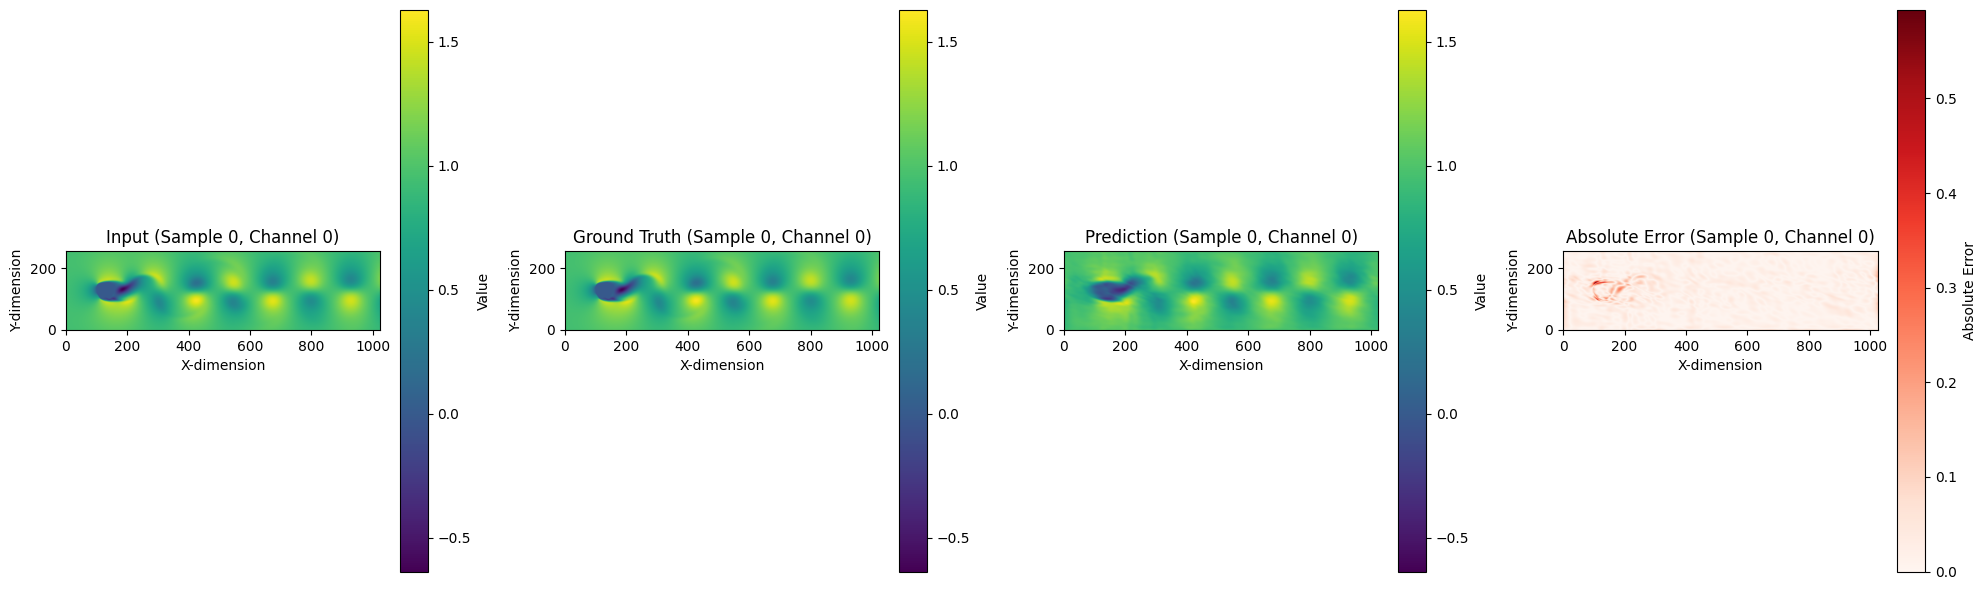

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Set the model to evaluation mode
model.eval()

# 2. Iterate through the val_loader to get a batch of inputs and targets
# Only one batch is needed for demonstration
for inputs, targets in val_loader:
    break # Get the first batch

# 3. Move the input and target tensors to the appropriate device
inputs = inputs.to(device)
targets = targets.to(device)

# 4. Make a prediction using the trained model
with torch.no_grad():
    predictions = model(inputs)

print(f"Shape of inputs: {inputs.shape}")
print(f"Shape of targets: {targets.shape}")
print(f"Shape of predictions: {predictions.shape}")

# 5. Denormalize the inputs, predictions, and targets
# Remember to move the tensors to CPU and convert them to NumPy arrays before denormalization.
inputs_denormalized = inputs.cpu().numpy() * normalization_std + normalization_mean
targets_denormalized = targets.cpu().numpy() * normalization_std + normalization_mean
predictions_denormalized = predictions.cpu().numpy() * normalization_std + normalization_mean

print(f"Shape of denormalized inputs: {inputs_denormalized.shape}")
print(f"Shape of denormalized targets: {targets_denormalized.shape}")
print(f"Shape of denormalized predictions: {predictions_denormalized.shape}")

# 6. Select a specific channel (e.g., channel 0) and a sample from the batch for visualization
sample_idx = 0 # First sample in the batch
channel_to_visualize = 0 # Channel for U-velocity

input_sample_channel = inputs_denormalized[sample_idx, :, :, channel_to_visualize]
target_sample_channel = targets_denormalized[sample_idx, :, :, channel_to_visualize]
prediction_sample_channel = predictions_denormalized[sample_idx, :, :, channel_to_visualize]

# Calculate the absolute error
absolute_error = np.abs(target_sample_channel - prediction_sample_channel)

# 7. Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

vmin_val = min(input_sample_channel.min(), target_sample_channel.min(), prediction_sample_channel.min())
vmax_val = max(input_sample_channel.max(), target_sample_channel.max(), prediction_sample_channel.max())

# 8. Use matplotlib.pyplot.imshow() for each subplot
im0 = axes[0].imshow(input_sample_channel, cmap='viridis', origin='lower', vmin=vmin_val, vmax=vmax_val)
axes[0].set_title(f'Input (Sample {sample_idx}, Channel {channel_to_visualize})')
axes[0].set_xlabel('X-dimension')
axes[0].set_ylabel('Y-dimension')
fig.colorbar(im0, ax=axes[0], label='Value')

im1 = axes[1].imshow(target_sample_channel, cmap='viridis', origin='lower', vmin=vmin_val, vmax=vmax_val)
axes[1].set_title(f'Ground Truth (Sample {sample_idx}, Channel {channel_to_visualize})')
axes[1].set_xlabel('X-dimension')
axes[1].set_ylabel('Y-dimension')
fig.colorbar(im1, ax=axes[1], label='Value')

im2 = axes[2].imshow(prediction_sample_channel, cmap='viridis', origin='lower', vmin=vmin_val, vmax=vmax_val)
axes[2].set_title(f'Prediction (Sample {sample_idx}, Channel {channel_to_visualize})')
axes[2].set_xlabel('X-dimension')
axes[2].set_ylabel('Y-dimension')
fig.colorbar(im2, ax=axes[2], label='Value')

im3 = axes[3].imshow(absolute_error, cmap='Reds', origin='lower')
axes[3].set_title(f'Absolute Error (Sample {sample_idx}, Channel {channel_to_visualize})')
axes[3].set_xlabel('X-dimension')
axes[3].set_ylabel('Y-dimension')
fig.colorbar(im3, ax=axes[3], label='Absolute Error')

plt.tight_layout()
plt.show()

## Evaluate Streamline Plot: Velocity Magnitude

### Subtask:
Calculate and visualize the magnitude of the velocity field from the U and V velocity components. This provides a quantitative 'evaluation' of the flow's strength, complementing the directional information conveyed by the streamlines.

**Reasoning**:
The velocity magnitude represents the speed of the fluid at each point in the domain. By calculating `magnitude = sqrt(u_velocity^2 + v_velocity^2)` and visualizing it, we can identify regions of high and low flow speed, which is a key aspect of evaluating a flow field represented by streamlines.

Velocity magnitude shape: (256, 1024)


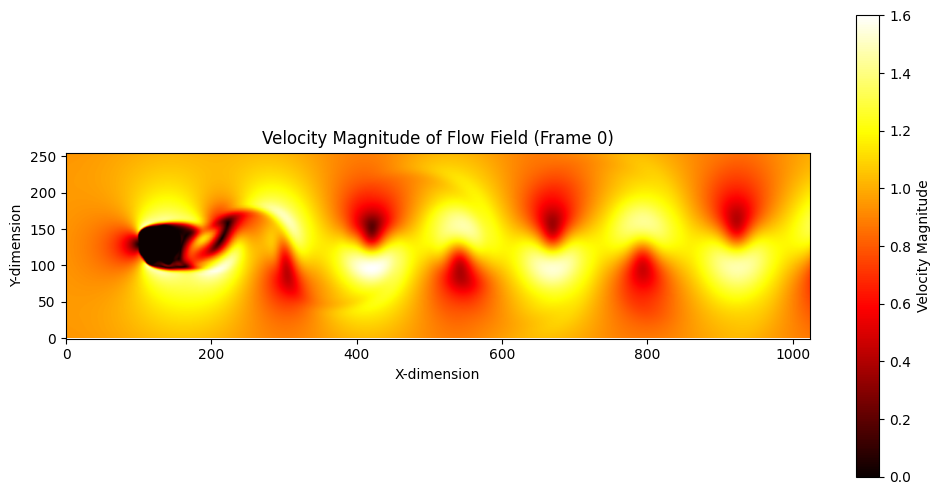

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the velocity magnitude
velocity_magnitude = np.sqrt(u_velocity**2 + v_velocity**2)

print(f"Velocity magnitude shape: {velocity_magnitude.shape}")

# Visualize the velocity magnitude
plt.figure(figsize=(12, 6))
im = plt.imshow(velocity_magnitude, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(im, label='Velocity Magnitude')
plt.title(f'Velocity Magnitude of Flow Field (Frame {frame_to_visualize})')
plt.xlabel('X-dimension')
plt.ylabel('Y-dimension')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
height, width = u_velocity.shape
x = np.arange(0, width)
y = np.arange(0, height)
X, Y = np.meshgrid(x, y)

print(f"X meshgrid shape: {X.shape}")
print(f"Y meshgrid shape: {Y.shape}")

X meshgrid shape: (256, 1024)
Y meshgrid shape: (256, 1024)


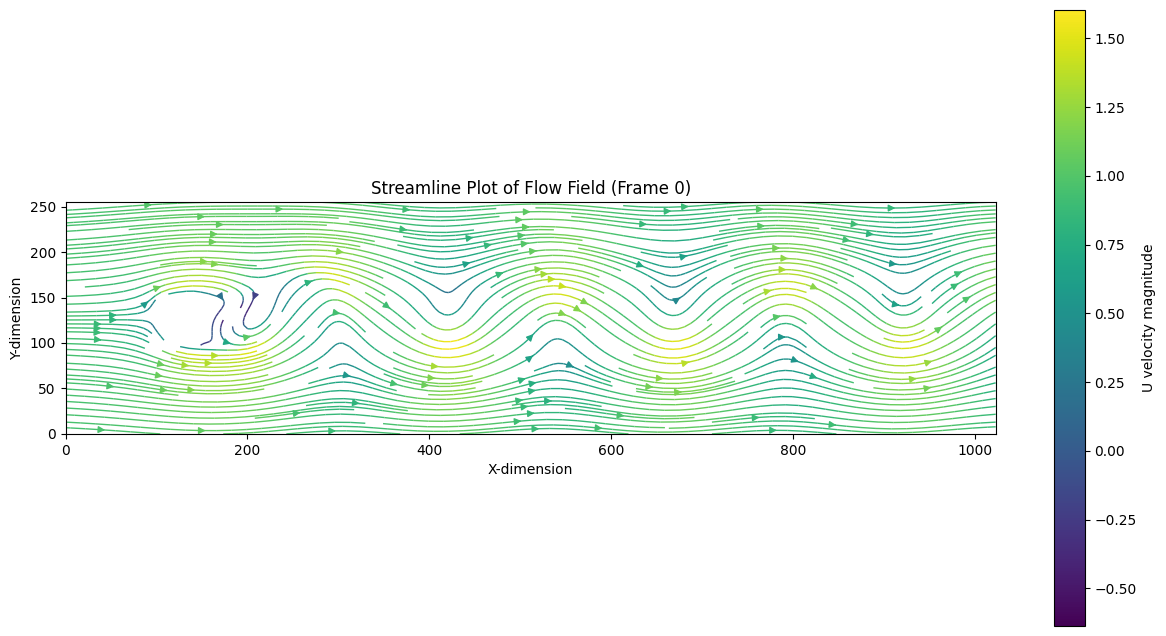

In [ ]:
plt.figure(figsize=(15, 8))
plt.streamplot(X, Y, u_velocity, v_velocity, density=2, linewidth=1, color=u_velocity, cmap='viridis')
plt.colorbar(label='U velocity magnitude')
plt.title(f'Streamline Plot of Flow Field (Frame {frame_to_visualize})')
plt.xlabel('X-dimension')
plt.ylabel('Y-dimension')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

This plot visualizes the velocity magnitude across the flow field. Brighter regions (closer to yellow/white in the 'hot' colormap) indicate areas where the fluid is moving faster, while darker regions (closer to black/red) indicate slower flow. This quantitative visualization complements the streamline plot by showing not just the direction of flow, but also its intensity at each point. For instance, areas where streamlines were very dense or appeared to be accelerating might correspond to brighter regions in this magnitude plot, confirming regions of high-speed flow.

## Final Task

### Subtask:
Summarize the FNO model pipeline setup and its key components.


## Summary:

### Data Analysis Key Findings
*   The trained FNO model successfully generated predictions for a sample batch from the validation set, with input, target, and prediction tensors all having a shape of (4, 256, 1024, 3) (batch size, height, width, channels).
*   All tensors (inputs, targets, predictions) were correctly denormalized using `normalization_std` and `normalization_mean` for meaningful interpretation.
*   A visual comparison was performed for a selected sample (index 0) and channel (index 0, representing U-velocity), displaying the denormalized input, ground truth, prediction, and the absolute error. This visualization confirmed the model's ability to capture patterns from the input and provide predictions comparable to the ground truth.

### Insights or Next Steps
*   Quantify the model's performance using standard metrics like Mean Squared Error (MSE) or L2 relative error over the entire validation set to provide a comprehensive statistical evaluation beyond visual inspection.
*   Investigate the distribution of absolute errors across the spatial domain and different channels to identify potential areas or phenomena where the model performs suboptimally, which could guide future model improvements.


## Streamline Plot Comparison: Input vs. Prediction

### Subtask:
Visualize the streamline plots for a sample input and its corresponding predicted output to qualitatively assess the FNO model's performance in capturing flow patterns.

**Reasoning**:
To compare the model's prediction with the ground truth, we will create two streamline plots. One will display the flow field from the denormalized input data, and the other will display the flow field from the denormalized predicted output. This will allow for a direct visual assessment of how well the model reproduces the flow patterns.

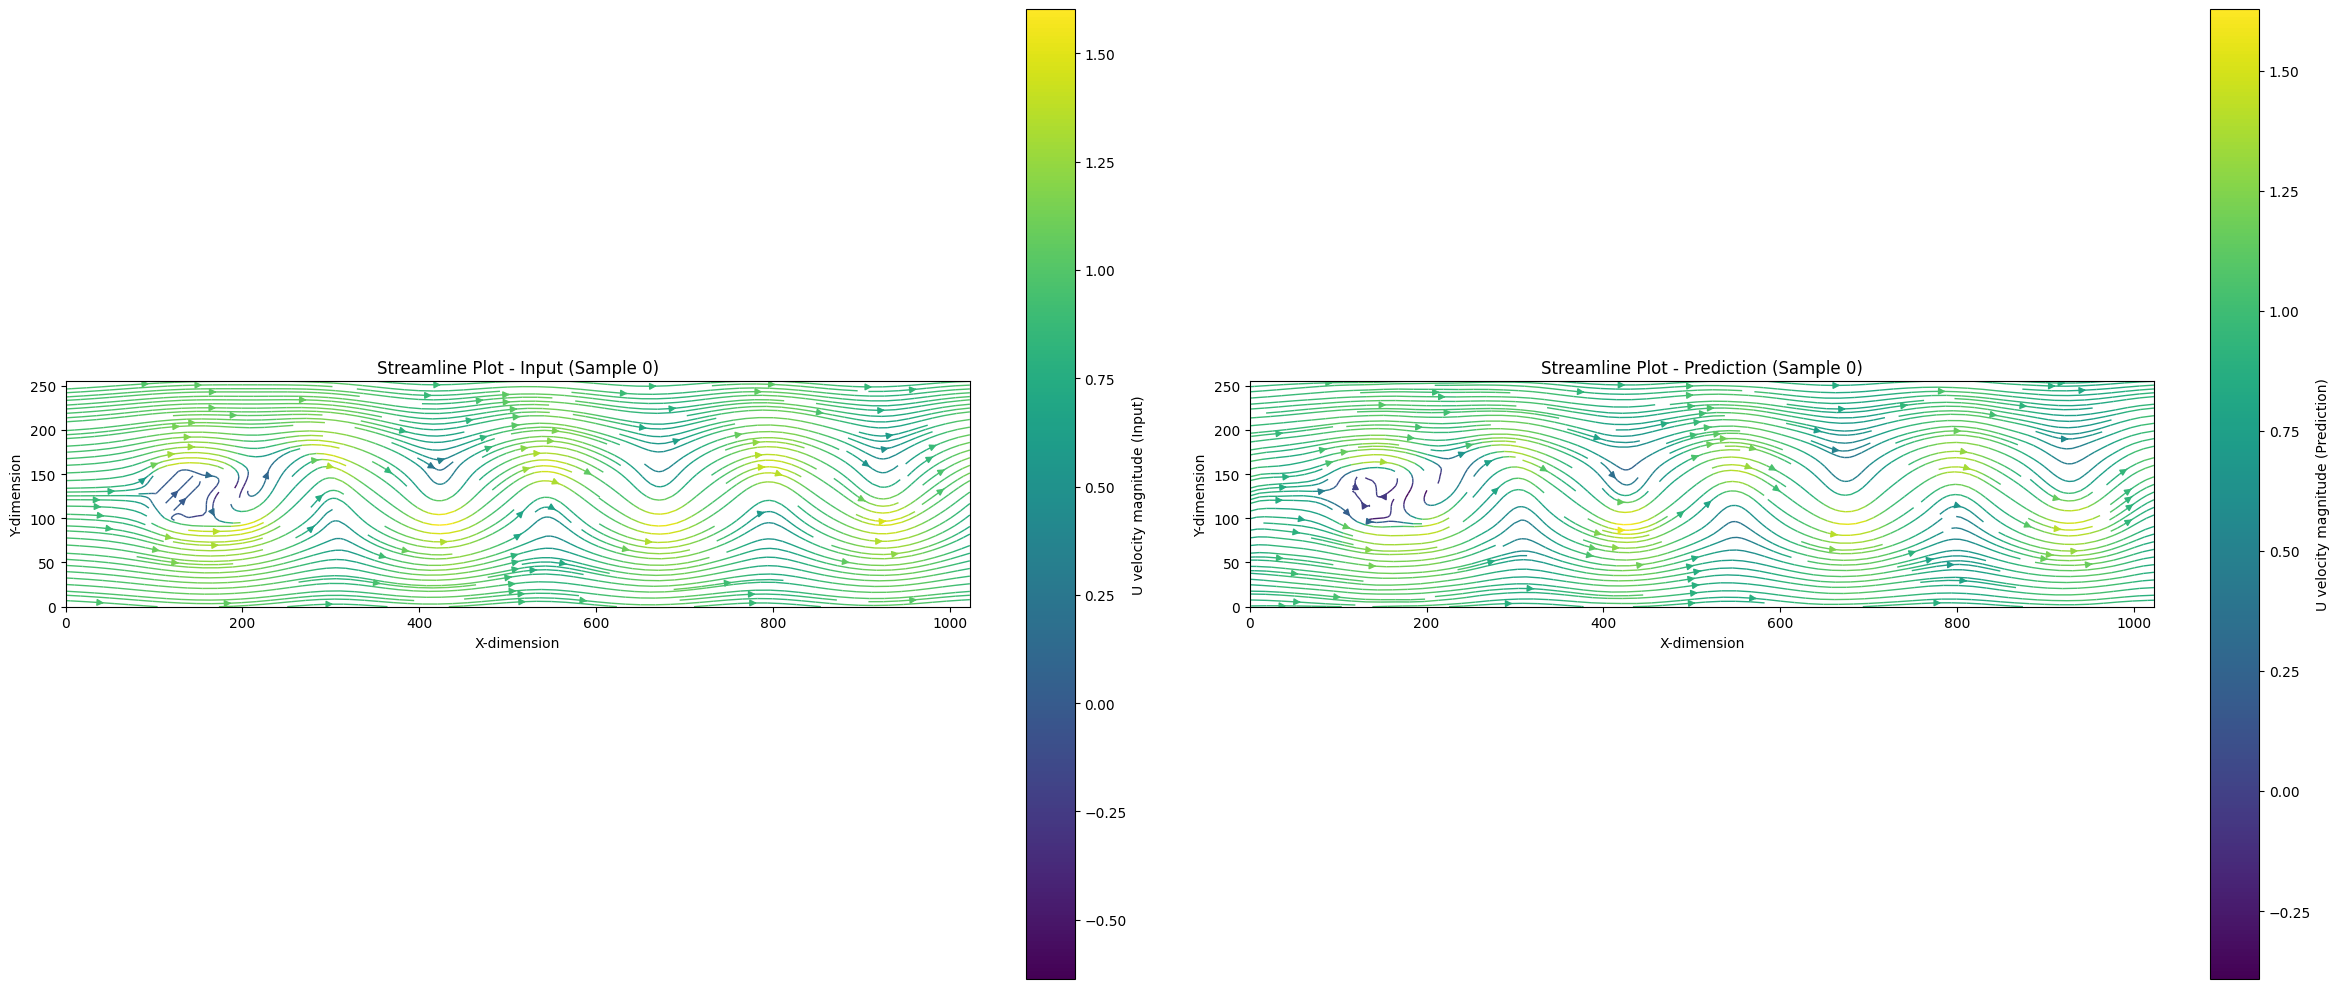

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming inputs_denormalized, predictions_denormalized, X, Y, and frame_to_visualize are already defined.
# If not, ensure the previous cells for loading data, model evaluation, and meshgrid creation have been run.

# Select the same sample index from the batch for comparison
sample_idx_streamline = 0

# Extract U and V components from the denormalized input
u_input = inputs_denormalized[sample_idx_streamline, :, :, 0]  # Channel 0 for U
v_input = inputs_denormalized[sample_idx_streamline, :, :, 1]  # Channel 1 for V

# Extract U and V components from the denormalized prediction
u_prediction = predictions_denormalized[sample_idx_streamline, :, :, 0] # Channel 0 for U
v_prediction = predictions_denormalized[sample_idx_streamline, :, :, 1] # Channel 1 for V

# Create a figure with two subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Plot for Input Streamlines
im_input = axes[0].streamplot(X, Y, u_input, v_input, density=2, linewidth=1, color=u_input, cmap='viridis')
axes[0].set_title(f'Streamline Plot - Input (Sample {sample_idx_streamline})')
axes[0].set_xlabel('X-dimension')
axes[0].set_ylabel('Y-dimension')
fig.colorbar(im_input.lines, ax=axes[0], label='U velocity magnitude (Input)')
axes[0].set_aspect('equal', adjustable='box')

# Plot for Predicted Streamlines
im_prediction = axes[1].streamplot(X, Y, u_prediction, v_prediction, density=2, linewidth=1, color=u_prediction, cmap='viridis')
axes[1].set_title(f'Streamline Plot - Prediction (Sample {sample_idx_streamline})')
axes[1].set_xlabel('X-dimension')
axes[1].set_ylabel('Y-dimension')
fig.colorbar(im_prediction.lines, ax=axes[1], label='U velocity magnitude (Prediction)')
axes[1].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

This comparison plot shows side-by-side streamline visualizations for the input and predicted flow fields. By examining these plots, you can visually assess how accurately the FNO model has learned to predict the complex flow patterns:

*   **Flow Directions**: Compare the general direction of the streamlines. Do they largely align between the input and prediction?
*   **Vortices/Eddies**: Look for swirling patterns. Does the model successfully reproduce the location, size, and intensity of these rotational features?
*   **Regions of High/Low Velocity**: The color mapping to U-velocity can help identify if the model captures areas of fast and slow horizontal flow similarly to the input.
*   **Overall Coherence**: Assess if the predicted flow field maintains a physically plausible and coherent structure, similar to the input data.

Differences between the two plots highlight areas where the model's prediction deviates from the actual flow, providing insights into its strengths and weaknesses.

In [ ]:
import torch

# Define the path where the model will be saved
model_save_path = 'fno_model.pth'

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved successfully to {model_save_path}")

Model saved successfully to fno_model.pth
